In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

## Data Uploading

In [2]:
cosmetic_dataset = pd.read_csv("E-commerce  cosmetic dataset.csv", encoding='ISO-8859-1')

## EDA Process & Data Processing

In [3]:
cosmetic_dataset.head()

,product_name,website,country,category,subcategory,title-href,price,brand,ingredients,form,type,color,size,rating,noofratings
0,"Carlton London Incense Eau da parfum, Premium ...",Flipkart,India,body,perfume,https://www.amazon.in/Carlton-London-Limited-I...,599.0,Carlton London,NaN,aerosol,NaN,"Top Note: Orange Blossom, Blackberry | Heart N...",100,3.9,19
1,CHARLENE SPRAY MIST PERFUME 30 - INTIMATE (PAC...,Flipkart,India,body,perfume,https://www.amazon.in/CHARLENE-SPRAY-MIST-PERF...,149.0,Charlene,NaN,aerosol,NaN,Unit count type:,30,4.4,"4,031"
2,CHARLENE SPRAY MIST PERFUME 30 - INTIMATE (PAC...,Flipkart,India,body,perfume,https://www.amazon.in/CHARLENE-SPRAY-MIST-PERF...,298.0,Charlene,NaN,aerosol,NaN,Unit count type:,30,4.4,"4,072"
3,DENVER Black Code Perfume - 60 | Eau de Parfum...,Flipkart,India,body,perfume,https://www.amazon.in/DENVER-Black-Code-Perfum...,245.0,Denver,NaN,aerosol,NaN,Long-Lasting Scent,60,4.2,61
4,Denver Hamilton Perfume - 100 | Long Lasting P...,Flipkart,India,body,perfume,https://www.amazon.in/Denver-Perfume-Hamilton-...,422.0,Denver,NaN,aerosol,NaN,Long-Lasting Scent,100,4.3,342


## Columns Descriptions
1. **Product Name**: Refers to the name of the cosmetic product.
2. **Website**: Indicates the e-commerce website the product was scraped from (Ulta, Amazon, Flipkart, or Sephora).
3. **Category**: Describes the main cosmetic category, such as eyes, face, lips, body, skincare, or hair.
4. **Subcategory**: Provides more specific classification within the main category.
5. **Href**: The direct URL link to the product page.
6. **Price**: Shows the price of the product in Indian Rupees (INR).
7. **Brand**: Specifies the brand associated with each product.
8. **Ingredients**: Lists the components or substances used to make the product.
9. **Form**: Refers to the physical consistency or format of the product (e.g., gel, cream, liquid).
10. **Type**: Includes additional descriptive information about the product.
11. **Color**: Indicates the product's color, if applicable.
12. **Quantity**: States the volume or weight of the product, typically in milliliters (ml).
13. **Rating**: Shows the average customer rating on a scale from 0 to 5.from 0 to 5.
14. **Number of Ratings**: The total number of customers who have rated

## Features Inspection

In [4]:
cosmetic_dataset.shape

(12615, 15)

In [5]:
cosmetic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12615 entries, 0 to 12614
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  12615 non-null  object 
 1   website       12615 non-null  object 
 2   country       12615 non-null  object 
 3   category      12615 non-null  object 
 4   subcategory   12615 non-null  object 
 5   title-href    12615 non-null  object 
 6   price         12298 non-null  float64
 7   brand         12615 non-null  object 
 8   ingredients   6600 non-null   object 
 9   form          12615 non-null  object 
 10  type          9934 non-null   object 
 11  color         10626 non-null  object 
 12  size          9449 non-null   object 
 13  rating        10548 non-null  object 
 14  noofratings   12156 non-null  object 
dtypes: float64(1), object(14)
memory usage: 1.4+ MB


In [6]:
cosmetic_dataset.nunique()

product_name    11341
website             5
country             2
category            6
subcategory        36
title-href      12244
price            1975
brand            1753
ingredients      4839
form               25
type              133
color            3357
size              700
rating            253
noofratings      2096
dtype: int64

In [7]:
for i in range(0, len(cosmetic_dataset.columns), 1):
    if cosmetic_dataset[cosmetic_dataset.columns[i]].nunique()<= 36 :
        print("Column Name :", cosmetic_dataset.columns[i])
        print(cosmetic_dataset[cosmetic_dataset.columns[i]].unique())
        print("-"*80)

Column Name : website
['Flipkart' 'ulta' 'Sephora' 'Amazon' 'sephora']
--------------------------------------------------------------------------------
Column Name : country
['India' 'USA']
--------------------------------------------------------------------------------
Column Name : category
['body' 'eyes' 'face' 'hair' 'lips' 'skincare']
--------------------------------------------------------------------------------
Column Name : subcategory
['perfume' 'bodywash' 'sunscreen' 'moisturizer' 'soap' 'mascara'
 'eyeshadow' 'eyeliner' 'primer' 'eye primer' 'eyebrow' 'serum'
 'eyelashes' 'foundation' 'shampoo' 'hairmask' 'conditioner' 'hairstyling'
 'oil' 'dry shampoo' 'lipliner' 'lipgloss' 'lipstick' 'lipbalm' 'lipstain'
 'cleanser' 'eye treatment' 'mask' 'toner' 'face wash' 'spray' 'blush'
 'concealer' 'powder' 'highlighter' 'face oil']
--------------------------------------------------------------------------------
Column Name : form
['aerosol' 'cream' 'foam' 'gel' 'liquid' 'lotion' 'so

#### Handling color feature 

In [8]:
cosmetic_dataset['color'].unique()

array(['Top Note: Orange Blossom, Blackberry | Heart Note: Bitter Almond, Jasmine, Coffee | Base Note: Vanilla, Cedar, White Musk',
       'Unit count type:', 'Long-Lasting Scent', ..., 'Pinklite',
       '001 Universal', 'Selfie Queen'], dtype=object)

In [9]:
cosmetic_dataset['color'].value_counts().head(50)

color
No color                 4197
Black                     440
Multicolor                192
No colour                 161
Pink                      149
Beige                      97
Multi                      79
White                      77
no                         77
As shown Picture           74
BLACK                      67
Brown                      64
Red                        63
As shown picture           55
Orange                     53
Blue                       48
Clear                      43
Transparent                40
Green                      38
Multicolour                33
MULTICOLOR                 31
Peach                      27
Nude                       25
Yellow                     24
PINK                       22
Silver                     21
Natural                    20
Gold                       20
As shown in the image      19
Rose                       19
Jet Black                  19
Medium Brown               17
Blackest Black             16
Ivor

## Labeling Undefined Colors

In [10]:
unclear_color_list = ['No color', 'Multicolor', 'No colour', 'no', 'Multicolour',
                     'MULTICOLOR', 'As shown in the image', 'Multi-colored', 'Multi-Color',
                      'As Per Image','As shown Picture','As shown picture','Multi']

cosmetic_dataset['color'] = cosmetic_dataset['color'].replace(unclear_color_list, 'un-clear-color-defination')
cosmetic_dataset['color'] = cosmetic_dataset['color'].fillna('un-clear-color-defination')

In [11]:
cosmetic_dataset['color'].value_counts()

color
un-clear-color-defination    6937
Black                         440
Pink                          149
Beige                          97
White                          77
                             ... 
Snowball                        1
5. Lustrous Nude                1
Certainly Red                   1
Power Move                      1
Selfie Queen                    1
Name: count, Length: 3345, dtype: int64

#### Percentage of Undefined Colors 

In [12]:
round((cosmetic_dataset['color'].value_counts().iloc[0] / len(cosmetic_dataset['color'])) * 100, 2)

54.99

In [13]:
## --> 55 % of colors in not clearly defined

In [14]:
cosmetic_dataset['color'].value_counts()[1:].count()

3344

In [15]:
len(cosmetic_dataset['color'])

12615

In [16]:
cosmetic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12615 entries, 0 to 12614
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  12615 non-null  object 
 1   website       12615 non-null  object 
 2   country       12615 non-null  object 
 3   category      12615 non-null  object 
 4   subcategory   12615 non-null  object 
 5   title-href    12615 non-null  object 
 6   price         12298 non-null  float64
 7   brand         12615 non-null  object 
 8   ingredients   6600 non-null   object 
 9   form          12615 non-null  object 
 10  type          9934 non-null   object 
 11  color         12615 non-null  object 
 12  size          9449 non-null   object 
 13  rating        10548 non-null  object 
 14  noofratings   12156 non-null  object 
dtypes: float64(1), object(14)
memory usage: 1.4+ MB


## Handling Missing Values

In [17]:
cosmetic_dataset = cosmetic_dataset.dropna(subset=['price'])

In [18]:
cosmetic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12298 entries, 0 to 12614
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  12298 non-null  object 
 1   website       12298 non-null  object 
 2   country       12298 non-null  object 
 3   category      12298 non-null  object 
 4   subcategory   12298 non-null  object 
 5   title-href    12298 non-null  object 
 6   price         12298 non-null  float64
 7   brand         12298 non-null  object 
 8   ingredients   6594 non-null   object 
 9   form          12298 non-null  object 
 10  type          9660 non-null   object 
 11  color         12298 non-null  object 
 12  size          9230 non-null   object 
 13  rating        10394 non-null  object 
 14  noofratings   11871 non-null  object 
dtypes: float64(1), object(14)
memory usage: 1.5+ MB


## Handling Ratings 

In [19]:
cosmetic_dataset['rating'].unique()

array(['3.9', '4.4', '4.2', '4.3', '4.5', '4.1', '4.7', '4', nan, '4.8',
       '4.6', '4.9', '3.7', '3', '5', '2.9', '3.6', '2.5', '3.2', '3.3',
       '3.8', '1', '3.4', '3.1', '134', '122', '2.4', '2.1', '427', '100',
       '2.3', '2', '3.5', '925', '14,338', '5.1', '1,374', '2,716', '109',
       '254', '296', '474', '244', '20', '4.14', '4.29', '42', '4,257',
       '895', '4.37', '4.18', '4.22', '4.21', '4.23', '4.19', '4.34',
       '155', '44', '2,272', '4.13', '52', '1,201', '116', '4.15', '4.27',
       '4.41', '4.51', '19,721', '1,875', '7,468', '2,595', '2,358',
       '2,199', '536', '41', '25', '251', '506', '173', '1,379', '676',
       '54', '53', '85', '4.07', '4.42', '4.33', '4.11', '4.24', '4.02',
       '4.35', '4.09', '4.17', '4.28', '4.26', '4.08', '4.16', '4.12',
       '4.05', '4.01', '4.06', '1.7', '4.39', '4.32', '4.87', '6', '4.61',
       '5.11', '4.25', '4.04', '4.31', '4.53', '4.76', '4.43', '4.03',
       '4.77', '4.38', '2.7', '4.45', '4.65', '4.47', '2

In [20]:
def clean_ratings(rating_series):
    def convert_rating(value):
        # Handle nan
        if pd.isna(value):
            return np.nan
        # Convert to string to handle various types
        value = str(value).strip()
        # Handle 'out of 5 stars' format
        if 'out of 5 stars' in value:
            try:
                return float(value.split(' out of')[0].strip())
            except ValueError:
                return np.nan
        # Remove commas from numbers (e.g., '14,338' to 14338)
        value = value.replace(',', '')
        # Try to convert to float
        try:
            num = float(value)
            # Check if the rating is within 0-5 range
            if 0 <= num <= 5:
                return num
            else:
                return np.nan  
        except ValueError:
            return np.nan  

    return rating_series.apply(convert_rating)

In [21]:
cosmetic_dataset['rating'] = clean_ratings(cosmetic_dataset['rating'])
print(cosmetic_dataset['rating'].unique())

[3.9  4.4  4.2  4.3  4.5  4.1  4.7  4.    nan 4.8  4.6  4.9  3.7  3.
 5.   2.9  3.6  2.5  3.2  3.3  3.8  1.   3.4  3.1  2.4  2.1  2.3  2.
 3.5  4.14 4.29 4.37 4.18 4.22 4.21 4.23 4.19 4.34 4.13 4.15 4.27 4.41
 4.51 4.07 4.42 4.33 4.11 4.24 4.02 4.35 4.09 4.17 4.28 4.26 4.08 4.16
 4.12 4.05 4.01 4.06 1.7  4.39 4.32 4.87 4.61 4.25 4.04 4.31 4.53 4.76
 4.43 4.03 4.77 4.38 2.7  4.45 4.65 4.47 2.6  4.46 4.44 4.36 4.52 2.8
 4.54 1.6  4.85 1.8  2.2  1.9  1.5  4.49 4.55 4.69 4.78 4.64 4.48 3.24
 3.37 3.69 3.61 3.11 3.44 3.43 3.19 3.05 3.14 3.58 3.65 3.71 3.07 3.12
 3.15 3.06 3.23 3.27 3.28 3.47 3.02 3.13 3.45 3.38 3.41 3.48 3.53 3.55
 3.62 3.63 3.74 3.31 3.32 3.34 3.35 3.25 3.33 3.21 3.49 3.16 3.42 3.46
 3.08 3.99 3.39 3.36 3.51 3.04 3.17 3.09 3.76 3.57 3.56 3.59 3.68 3.87
 3.52 3.29 3.81 3.91 3.54 3.77 3.67 3.78 3.18 3.64 3.22 3.66 3.73 3.98
 3.26 3.75 3.95]


C:\Users\Blu-Ray\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


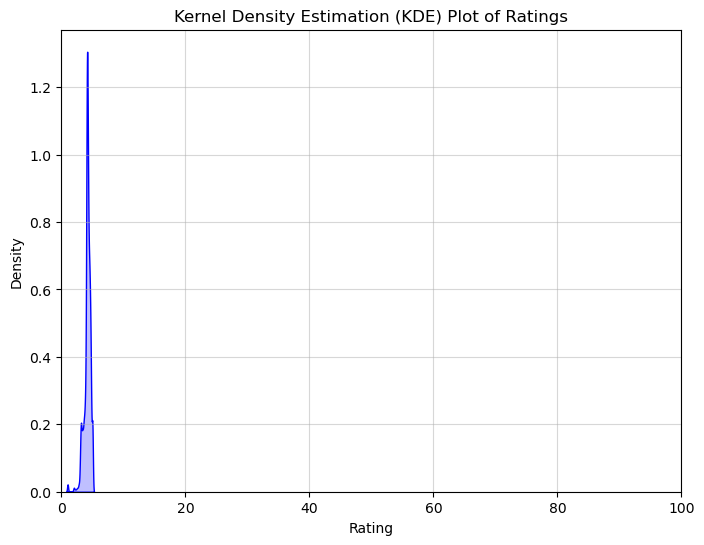

In [22]:
ratings = cosmetic_dataset[cosmetic_dataset['rating'].notna()]['rating']

plt.figure(figsize=(8, 6))  
sns.kdeplot(data=ratings, fill=True, color='blue') 
plt.title('Kernel Density Estimation (KDE) Plot of Ratings')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.grid(True, alpha=0.5)  
plt.xlim(0, 100) 
plt.show()

In [23]:
ratings.mean()

4.135679442508711

In [24]:
ratings.median()

4.2

In [25]:
cosmetic_dataset['rating'] = cosmetic_dataset['rating'].fillna(ratings.median())

In [26]:
cosmetic_dataset['rating'].unique()

array([3.9 , 4.4 , 4.2 , 4.3 , 4.5 , 4.1 , 4.7 , 4.  , 4.8 , 4.6 , 4.9 ,
       3.7 , 3.  , 5.  , 2.9 , 3.6 , 2.5 , 3.2 , 3.3 , 3.8 , 1.  , 3.4 ,
       3.1 , 2.4 , 2.1 , 2.3 , 2.  , 3.5 , 4.14, 4.29, 4.37, 4.18, 4.22,
       4.21, 4.23, 4.19, 4.34, 4.13, 4.15, 4.27, 4.41, 4.51, 4.07, 4.42,
       4.33, 4.11, 4.24, 4.02, 4.35, 4.09, 4.17, 4.28, 4.26, 4.08, 4.16,
       4.12, 4.05, 4.01, 4.06, 1.7 , 4.39, 4.32, 4.87, 4.61, 4.25, 4.04,
       4.31, 4.53, 4.76, 4.43, 4.03, 4.77, 4.38, 2.7 , 4.45, 4.65, 4.47,
       2.6 , 4.46, 4.44, 4.36, 4.52, 2.8 , 4.54, 1.6 , 4.85, 1.8 , 2.2 ,
       1.9 , 1.5 , 4.49, 4.55, 4.69, 4.78, 4.64, 4.48, 3.24, 3.37, 3.69,
       3.61, 3.11, 3.44, 3.43, 3.19, 3.05, 3.14, 3.58, 3.65, 3.71, 3.07,
       3.12, 3.15, 3.06, 3.23, 3.27, 3.28, 3.47, 3.02, 3.13, 3.45, 3.38,
       3.41, 3.48, 3.53, 3.55, 3.62, 3.63, 3.74, 3.31, 3.32, 3.34, 3.35,
       3.25, 3.33, 3.21, 3.49, 3.16, 3.42, 3.46, 3.08, 3.99, 3.39, 3.36,
       3.51, 3.04, 3.17, 3.09, 3.76, 3.57, 3.56, 3.

In [27]:
cosmetic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12298 entries, 0 to 12614
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  12298 non-null  object 
 1   website       12298 non-null  object 
 2   country       12298 non-null  object 
 3   category      12298 non-null  object 
 4   subcategory   12298 non-null  object 
 5   title-href    12298 non-null  object 
 6   price         12298 non-null  float64
 7   brand         12298 non-null  object 
 8   ingredients   6594 non-null   object 
 9   form          12298 non-null  object 
 10  type          9660 non-null   object 
 11  color         12298 non-null  object 
 12  size          9230 non-null   object 
 13  rating        12298 non-null  float64
 14  noofratings   11871 non-null  object 
dtypes: float64(2), object(13)
memory usage: 1.5+ MB


## Final Dataset for Applying Analysis using Excel fpr Visiulaization 

In [32]:
cosmetic_processed_dataset =  cosmetic_dataset[['product_name', 'website', 'country', 'category','subcategory','price','brand','form','rating']]

In [33]:
cosmetic_processed_dataset

,product_name,website,country,category,subcategory,price,brand,form,rating
0,"Carlton London Incense Eau da parfum, Premium ...",Flipkart,India,body,perfume,599.0,Carlton London,aerosol,3.90
1,CHARLENE SPRAY MIST PERFUME 30 - INTIMATE (PAC...,Flipkart,India,body,perfume,149.0,Charlene,aerosol,4.40
2,CHARLENE SPRAY MIST PERFUME 30 - INTIMATE (PAC...,Flipkart,India,body,perfume,298.0,Charlene,aerosol,4.40
3,DENVER Black Code Perfume - 60 | Eau de Parfum...,Flipkart,India,body,perfume,245.0,Denver,aerosol,4.20
4,Denver Hamilton Perfume - 100 | Long Lasting P...,Flipkart,India,body,perfume,422.0,Denver,aerosol,4.30
...,...,...,...,...,...,...,...,...,...
12610,Bright Future - Smoothing & Brightening Concea...,Sephora,India,face,concealer,1900.0,MAC Cosmetics,cream,3.15
12611,Bright Future - Smoothing & Brightening Concea...,Sephora,India,face,concealer,2150.0,MAC Cosmetics,cream,3.13
12612,Starlaa Rosy Bronze Blush Mini,Sephora,India,face,blush,3040.0,Klara Cosmetics,powder,4.03
12613,Terra Golden Brick Red Blush Travel Size Mini,Sephora,India,face,blush,2950.0,CLINIQUE,liquid,3.15


In [34]:
cosmetic_processed_dataset.to_csv("cosmetic_processed_dataset.csv")